In [1]:
import xarray as xr

# Load all the gridded kps and reproject
kp_coeffs = xr.open_dataset("outputs/kp_coefficients.nc")
kp_coeffs

<xarray.Dataset> Size: 19MB
Dimensions:   (case_num: 696, site: 5, freq: 29, dir: 24)
Coordinates:
  * case_num  (case_num) int64 6kB 0 1 2 3 4 5 6 ... 689 690 691 692 693 694 695
  * site      (site) int64 40B 1 2 3 4 5
  * freq      (freq) float64 232B 0.035 0.0385 0.0423 ... 0.4135 0.4547 0.5
  * dir       (dir) float64 192B 7.5 22.5 37.5 52.5 ... 307.5 322.5 337.5 352.5
    lat       float64 8B ...
    lon       float64 8B ...
    utm_x     (site) float64 40B ...
    utm_y     (site) float64 40B ...
Data variables:
    kps       (case_num, site, freq, dir) float64 19MB ...

In [2]:
import pandas as pd
from utils.operations import transform_ERA5_spectrum

model_parameters = pd.read_csv("ISLAND_CASES/swan_cases.csv").to_dict(orient="list")

# Load interest spectra

offshore_spectra, offshore_spectra_case = transform_ERA5_spectrum(
    era5_spectrum=xr.open_dataset("inputs/synthetic_spectra.nc"),
    subset_parameters=model_parameters,
    available_case_num=kp_coeffs.case_num.values,
)
offshore_spectra_case

<xarray.DataArray 'efth' (case_num: 696, time: 17520)> Size: 98MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * case_num   (case_num) int64 6kB 0 1 2 3 4 5 6 ... 690 691 692 693 694 695
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 140kB 2009-01-01 ... 2010-12-31T23:00:00

In [ ]:
from bluemath_tk.waves.binwaves import reconstruc_spectra

time_to_reconstruct = "2010-02-20"

# Reconstruct spectra
reconstructed_onshore_spectra = reconstruc_spectra(
    offshore_spectra=offshore_spectra_case.sel(time=time_to_reconstruct),
    kp_coeffs=kp_coeffs,
)
reconstructed_onshore_spectra

/home/tausiaj/miniforge3/envs/bluemath-dev/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43003 instead
  warnings.warn(


<xarray.Dataset> Size: 669kB
Dimensions:    (site: 5, freq: 29, dir: 24, time: 24)
Coordinates:
  * site       (site) int64 40B 1 2 3 4 5
  * freq       (freq) float64 232B 0.035 0.0385 0.0423 ... 0.4135 0.4547 0.5
  * dir        (dir) float64 192B 7.5 22.5 37.5 52.5 ... 307.5 322.5 337.5 352.5
    lat        float64 8B 0.0
    lon        float64 8B 0.0
    utm_x      (site) float64 40B -3.565 -3.59 -3.565 -3.59 -3.575
    utm_y      (site) float64 40B 43.52 43.52 43.51 43.51 43.5
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 192B 2010-02-20 ... 2010-02-20T23:00:00
Data variables:
    kps        (time, site, freq, dir) float64 668kB 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [4]:
offshore_spectra_edit = offshore_spectra.assign_coords(latitude=43.56, longitude=-3.60)

(<Figure size 1500x600 with 2 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

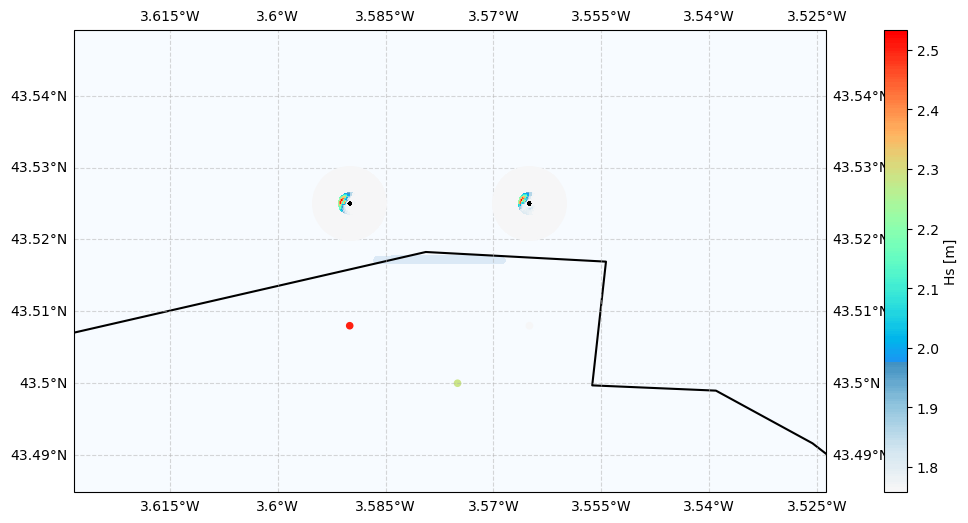

In [6]:
import xarray as xr
from utils.plotting import plot_spectrum_in_coastline

time_to_plot = "2010-02-20 12:00"

# Plot the spectrum along the coastline
bathy = xr.open_dataset("inputs/bathymetry_ISLAND_lonlat.nc").elevation
plot_spectrum_in_coastline(
    bathy=bathy,
    reconstructed_onshore_spectra=reconstructed_onshore_spectra.rename({"kps": "kp"}),
    reconstruction_kps=kp_coeffs,
    offshore_spectra=offshore_spectra_edit,
    time_to_plot=time_to_plot,
    sites_for_spectrum=[0, 1],
)